In [1]:
print("all ok")

all ok


In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END
from langchain.output_parsers import PydanticOutputParser

In [4]:
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
output = model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


In [5]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
len(embeddings.embed_query("hi"))

768

In [6]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader, PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter 

In [7]:
loader=DirectoryLoader("../data",glob="./*.pdf",loader_cls=PyPDFLoader)
docs = loader.load()

In [8]:
docs[0]

Document(metadata={'producer': 'Skia/PDF m135', 'creator': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/135.0.0.0 Safari/537.36', 'creationdate': '2025-06-08T07:04:03+00:00', 'title': 'President of India - Wikipedia', 'moddate': '2025-06-08T07:04:03+00:00', 'source': '..\\data\\President_of_India.pdf', 'total_pages': 24, 'page': 0, 'page_label': '1'}, page_content="President of the Republic of India\nBhārata kē Rā ṣṭ rapati\nLogo of the President of India\nFlag of India\nIncumbent\nDroupadi Murmu\nsince 25 July 2022\nHead of state of the Republic of India\nExecutive branch of the Indian Government\nStyle Hon'ble President\n(within India)[1]\nPresident of India\nThe president of India (ISO: Bhārata kē Rā ṣṭ rapati)\nis the head of state of the Republic of India. The\npresident is the nominal head of the executive,[a] the\nfirst citizen of the country, and the supreme\ncommander of the Indian Armed Forces. Droupadi\nMurmu is the 15th and current 

In [9]:
## Get the source
docs[0].metadata["source"]

'..\\data\\President_of_India.pdf'

In [10]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [11]:
new_docs=text_splitter.split_documents(documents=docs)
new_docs

[Document(metadata={'producer': 'Skia/PDF m135', 'creator': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/135.0.0.0 Safari/537.36', 'creationdate': '2025-06-08T07:04:03+00:00', 'title': 'President of India - Wikipedia', 'moddate': '2025-06-08T07:04:03+00:00', 'source': '..\\data\\President_of_India.pdf', 'total_pages': 24, 'page': 0, 'page_label': '1'}, page_content='President of the Republic of India\nBhārata kē Rā ṣṭ rapati\nLogo of the President of India\nFlag of India\nIncumbent\nDroupadi Murmu\nsince 25 July 2022\nHead of state of the Republic of India'),
 Document(metadata={'producer': 'Skia/PDF m135', 'creator': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/135.0.0.0 Safari/537.36', 'creationdate': '2025-06-08T07:04:03+00:00', 'title': 'President of India - Wikipedia', 'moddate': '2025-06-08T07:04:03+00:00', 'source': '..\\data\\President_of_India.pdf', 'total_pages': 24, 'page': 0, 'page_label': '

In [12]:
doc_string=[docs.page_content for docs in new_docs]

doc_string

['President of the Republic of India\nBhārata kē Rā ṣṭ rapati\nLogo of the President of India\nFlag of India\nIncumbent\nDroupadi Murmu\nsince 25 July 2022\nHead of state of the Republic of India',
 "Head of state of the Republic of India\nExecutive branch of the Indian Government\nStyle Hon'ble President\n(within India)[1]\nPresident of India\nThe president of India (ISO: Bhārata kē Rā ṣṭ rapati)",
 'is the head of state of the Republic of India. The\npresident is the nominal head of the executive,[a] the\nfirst citizen of the country, and the supreme\ncommander of the Indian Armed Forces. Droupadi',
 "commander of the Indian Armed Forces. Droupadi\nMurmu is the 15th and current president, having taken\noffice on 25 July 2022.\nThe office of president was created when India's",
 "The office of president was created when India's\nconstitution came into force and it became a republic\non 26 January 1950. The president is indirectly\nelected by an electoral college comprising both",
 "el

In [13]:
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 3})

In [14]:
retriever.invoke("What is the Rashprati Bhavan")

[Document(metadata={'creationdate': '2025-06-08T07:04:03+00:00', 'creator': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/135.0.0.0 Safari/537.36', 'moddate': '2025-06-08T07:04:03+00:00', 'page': 11, 'page_label': '12', 'producer': 'Skia/PDF m135', 'source': '..\\data\\President_of_India.pdf', 'title': 'President of India - Wikipedia', 'total_pages': 24}, page_content='Rashtrapati Bhavan,\nthe official residence\nof the president,\nlocated in New Delhi\n \nRashtrapati Nilayam\nis the official retreat\nof the president\nlocated in\nHyderabad.\n \nThe Retreat Building is'),
 Document(metadata={'creationdate': '2025-06-08T07:04:03+00:00', 'creator': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/135.0.0.0 Safari/537.36', 'moddate': '2025-06-08T07:04:03+00:00', 'page': 10, 'page_label': '11', 'producer': 'Skia/PDF m135', 'source': '..\\data\\President_of_India.pdf', 'title': 'President of India - Wikipedia', '

In [15]:
class QuerySelectionParser(BaseModel):
    Query:str=Field(description="selected query")
    Reasoning:str=Field(description='Reasoning behind query selection')

In [16]:
parser=PydanticOutputParser(pydantic_object=QuerySelectionParser)

In [17]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Query": {"description": "selected query", "title": "Query", "type": "string"}, "Reasoning": {"description": "Reasoning behind query selection", "title": "Reasoning", "type": "string"}}, "required": ["Query", "Reasoning"]}\n```'

In [18]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [19]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [Related to President of India, Not Related to President of India]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Query]}

In [20]:
state1={"messages":["who is the president?"]}

In [21]:
function_1(state1)

Question who is the president?
Parsed response: Query='Related to President of India' Reasoning='The query "who is the president?" is ambiguous but can refer to the President of India.  Without further context, it\'s the most likely interpretation.'


{'messages': ['Related to President of India']}

In [22]:
state2 = {"messages":["who is Narendra Modi?"]}

In [23]:
function_1(state2)

Question who is Narendra Modi?
Parsed response: Query='Not Related to President of India' Reasoning='Narendra Modi is the Prime Minister of India, not the President.'


{'messages': ['Not Related to President of India']}

In [24]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [25]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [26]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [27]:
def router(state: AgentState) -> str:
    print("-> ROUTER ->")

    last_message = state["messages"][-1]
    print("last_message:", last_message)

    if "president of india" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [28]:
from langgraph.graph import StateGraph,END
from IPython.display import Image, display

In [29]:
workflow=StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)

In [30]:
workflow.set_entry_point("Supervisor")

In [31]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [32]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

app = workflow.compile()

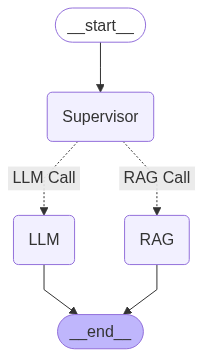

In [33]:
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
state1={"messages":["How president is elected in India?"]}
state2 = {"messages": ["what happened in RCB victory parade?"]}
state3 = {"messages": ["Did KKR victory parade took place?, and how many times KKR won IPL?"]}
state4 = {"messages": ["Who is the current president, is it a he or she and when it got elected?"]}

In [35]:
result = app.invoke(state1)
result

Question How president is elected in India?
Parsed response: Query='Related to President of India' Reasoning='The query explicitly asks about the election process of the President of India.'
-> ROUTER ->
last_message: Related to President of India
-> RAG Call ->


{'messages': ['How president is elected in India?',
  'Related to President of India',
  'In India, the president is indirectly elected by an electoral college.  This college consists of elected members of the Parliament and state legislative assemblies.  The election process is more extensive than that for the prime minister.']}

In [36]:
result = app.invoke(state2)
result

Question what happened in RCB victory parade?
Parsed response: Query='what happened in RCB victory parade?' Reasoning="The query is about a cricket team's victory parade, which is unrelated to the President of India."
-> ROUTER ->
last_message: what happened in RCB victory parade?
-> LLM Call ->


{'messages': ['what happened in RCB victory parade?',
  'what happened in RCB victory parade?',
  'There has never been an official RCB (Royal Challengers Bangalore) victory parade.  While RCB has had successful seasons in the Indian Premier League (IPL), they have never won the championship.  Therefore, a victory parade celebrating an IPL win has never occurred.']}

In [37]:
result = app.invoke(state3)
result

Question Did KKR victory parade took place?, and how many times KKR won IPL?
Parsed response: Query='Not Related to President of India' Reasoning='The query is about Kolkata Knight Riders (KKR), an IPL cricket team, and its victories.  This is unrelated to the President of India.'
-> ROUTER ->
last_message: Not Related to President of India
-> RAG Call ->


{'messages': ['Did KKR victory parade took place?, and how many times KKR won IPL?',
  'Not Related to President of India',
  "This document does not contain information about KKR's IPL victories or victory parades.  Therefore, I cannot answer your question."]}

In [38]:
result = app.invoke(state4)
result

Question Who is the current president, is it a he or she and when it got elected?
Parsed response: Query='Related to President of India' Reasoning='The query explicitly asks about the current president, their gender, and election date, all of which are related to the office of the President of India.'
-> ROUTER ->
last_message: Related to President of India
-> RAG Call ->


{'messages': ['Who is the current president, is it a he or she and when it got elected?',
  'Related to President of India',
  'The current president of India is Droupadi Murmu, a she.  She was elected and assumed office on July 25, 2022.']}